In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from matplotlib import rc

rc('font', family='NanumGothic')
plt.rcParams['axes.unicode_minus'] = False

In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 49 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum all 20170925-1 [9,604 kB]
Fetched 9,604 kB in 2s (3,921 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletyp

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
demo_df = pd.read_csv("/content/drive/MyDrive/LPOINT_BIG_COMP_01_DEMO.csv")
pdde_df = pd.read_csv("/content/drive/MyDrive/LPOINT_BIG_COMP_02_PDDE.csv")
cop_df = pd.read_csv("/content/drive/MyDrive/LPOINT_BIG_COMP_03_COP_U.csv")
pd_df = pd.read_csv("/content/drive/MyDrive/LPOINT_BIG_COMP_04_PD_CLAC.csv")
br_df = pd.read_csv("/content/drive/MyDrive/LPOINT_BIG_COMP_05_BR.csv")
lpay_df = pd.read_csv("/content/drive/MyDrive/LPOINT_BIG_COMP_06_LPAY.csv")

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (4) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [ ]:
cus_join = pd.merge(demo_df,pdde_df, on="cust", how='inner')
cus_join

,cust,ma_fem_dv,ages,zon_hlv,rct_no,chnl_dv,cop_c,br_c,pd_c,de_dt,de_hr,buy_am,buy_ct
0,M000034966,여성,40대,Z07,A01016688590,1,A01,A010045,PD0777,20210116,18,59000.0,1
1,M000034966,여성,40대,Z07,A01016688590,1,A01,A010045,PD0777,20210116,18,19000.0,1
2,M000034966,여성,40대,Z07,A01016688590,1,A01,A010045,PD0796,20210116,18,100.0,1
3,M000034966,여성,40대,Z07,A01016718167,1,A01,A010045,PD0816,20210116,18,62100.0,1
4,M000034966,여성,40대,Z07,A02357398521,1,A02,A020116,PD0630,20210325,13,19900.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4381738,M999962961,여성,50대,Z17,A05001012161,1,A05,A050039,PD0541,20210313,20,599000.0,1
4381739,M999962961,여성,50대,Z17,E06002810292,2,A06,NaN,PD0959,20210113,18,129000.0,1
4381740,M999962961,여성,50대,Z17,E06004609359,2,A06,NaN,PD0954,20210122,14,34300.0,1
4381741,M999962961,여성,50대,Z17,E06025413888,2,A06,NaN,PD0967,20210406,17,89000.0,1


In [ ]:
cus_merge = pd.merge(cus_join,pd_df, on = "pd_c", how='inner' )
cus_merge

,cust,ma_fem_dv,ages,zon_hlv,rct_no,chnl_dv,cop_c,br_c,pd_c,de_dt,de_hr,buy_am,buy_ct,pd_nm,clac_hlv_nm,clac_mcls_nm
0,M000034966,여성,40대,Z07,A01016688590,1,A01,A010045,PD0777,20210116,18,59000.0,1,남성런닝/트레이닝화,스포츠패션,남성스포츠화
1,M000034966,여성,40대,Z07,A01016688590,1,A01,A010045,PD0777,20210116,18,19000.0,1,남성런닝/트레이닝화,스포츠패션,남성스포츠화
2,M000136117,여성,30대,Z11,A01294575336,1,A01,A010018,PD0777,20210805,15,239000.0,1,남성런닝/트레이닝화,스포츠패션,남성스포츠화
3,M000261625,여성,40대,Z17,A01117216600,1,A01,A010017,PD0777,20210403,13,179000.0,1,남성런닝/트레이닝화,스포츠패션,남성스포츠화
4,M000419293,여성,40대,Z17,A02041463489,1,A02,A020008,PD0777,20210129,14,3000.0,3,남성런닝/트레이닝화,스포츠패션,남성스포츠화
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4381738,M858719851,여성,60대,Z16,A05001516873,1,A05,A050072,PD0995,20210430,10,139000.0,1,보이스레코더,영상/음향가전,소형디지털가전
4381739,M880029153,남성,40대,Z16,E06043468594,2,A06,NaN,PD0917,20210712,21,199000.0,1,미니벨로,아웃도어/레저,자전거
4381740,M986268092,남성,40대,Z09,E06040602652,2,A06,NaN,PD0917,20210523,8,187050.0,1,미니벨로,아웃도어/레저,자전거
4381741,M926014276,남성,40대,Z10,A02105319111,1,A02,A020023,PD1059,20210828,17,800000.0,8,분양,원예/애완,동물병원


In [ ]:
cus_3040 = cus_merge.loc[((cus_merge['ages'] == '30대') | (cus_merge['ages'] == '40대')) & ((cus_merge['cop_c'] == 'A01') |  (cus_merge['cop_c'] == 'A06')) , : ]
cus_3040

,cust,ma_fem_dv,ages,zon_hlv,rct_no,chnl_dv,cop_c,br_c,pd_c,de_dt,de_hr,buy_am,buy_ct,pd_nm,clac_hlv_nm,clac_mcls_nm
0,M000034966,여성,40대,Z07,A01016688590,1,A01,A010045,PD0777,20210116,18,59000.0,1,남성런닝/트레이닝화,스포츠패션,남성스포츠화
1,M000034966,여성,40대,Z07,A01016688590,1,A01,A010045,PD0777,20210116,18,19000.0,1,남성런닝/트레이닝화,스포츠패션,남성스포츠화
2,M000136117,여성,30대,Z11,A01294575336,1,A01,A010018,PD0777,20210805,15,239000.0,1,남성런닝/트레이닝화,스포츠패션,남성스포츠화
3,M000261625,여성,40대,Z17,A01117216600,1,A01,A010017,PD0777,20210403,13,179000.0,1,남성런닝/트레이닝화,스포츠패션,남성스포츠화
9,M000557840,남성,30대,Z11,A01078954018,1,A01,A010024,PD0777,20210306,15,69400.0,1,남성런닝/트레이닝화,스포츠패션,남성스포츠화
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4381733,M762888764,여성,30대,Z11,E06033428238,2,A06,NaN,PD1010,20210428,10,28580.0,1,기타광학기기,영상/음향가전,카메라/캠코더
4381735,M897387507,남성,40대,Z07,E06015295559,2,A06,NaN,PD0912,20210307,10,908000.0,1,전동보드/전동킥보드,아웃도어/레저,인라인/스케이트보드/킥보드
4381736,M802756595,남성,40대,Z17,E06006556124,2,A06,NaN,PD0066,20210131,19,229000.0,1,녹즙기/원액기,건강용품,건강가전
4381739,M880029153,남성,40대,Z16,E06043468594,2,A06,NaN,PD0917,20210712,21,199000.0,1,미니벨로,아웃도어/레저,자전거


In [ ]:
cus_3040.groupby('pd_nm')['cust'].count().sort_values(ascending=False).head(50)

pd_nm
임대매출            23638
기타남성의류세트        22215
디저트             14549
푸드코트한식          11169
한식              10869
여성티셔츠/탑         10664
베이커리일반빵          9276
일반스낵             9261
남성티셔츠            8572
커피/음료            8087
남성런닝/트레이닝화       7623
쿠키               6826
일식               6517
남성트레이닝복          5612
양식               5351
기타여성의류세트         4991
기타여성의류아우터        4934
기타패션잡화           4780
커피음료             4767
일반빵              4703
푸드코트컨세션          4576
남아티셔츠/탑          4488
기타레토르트           3938
남성스포츠티셔츠         3838
동남아식             3823
식음료모바일상품권        3706
백화점/마트모바일상품권     3614
빵/케이크            3538
기타국산과일류          3246
푸드코트일식           3062
여성재킷             3056
여아티셔츠/탑          2990
여성원피스            2935
기타아웃도어/레저용품      2905
베이커리             2799
레드와인             2579
어묵               2397
여성런닝/트레이닝화       2325
여성블라우스           2196
영화/문화모바일상품권      2159
중식               1975
패스트푸드            1843
여성바지             1819
스킨/토너            1815
즉석어묵             1771
여성숄더

In [ ]:
cus_3040.groupby('pd_nm')["buy_am"].sum().sort_values(ascending=False).head(50)

pd_nm
기타패션잡화          2.540611e+09
여성가방액세서리        2.468111e+09
여성숄더백           1.965556e+09
남성시계            1.860431e+09
여성토트백           1.456995e+09
기타남성의류세트        1.209990e+09
기타여성의류세트        1.004546e+09
기타여성의류아우터       9.254669e+08
여성재킷            9.118639e+08
여성티셔츠/탑         8.974081e+08
기타보석류           8.661943e+08
임대매출            8.549253e+08
남성티셔츠           8.286750e+08
반지              8.225161e+08
침대              7.146796e+08
양문형냉장고          6.847774e+08
드럼세탁기           6.679470e+08
여성코트            6.603520e+08
남성런닝/트레이닝화      6.592598e+08
여성원피스           6.568442e+08
남성트레이닝복         4.631006e+08
소파              4.627309e+08
UHD             4.534354e+08
에센스/세럼          4.388475e+08
기타가구            3.863221e+08
여성시계            3.842235e+08
남아티셔츠/탑         3.618827e+08
기타아웃도어/레저용품     3.589739e+08
LED             3.431332e+08
남성스포츠티셔츠        3.325639e+08
남성정장세트          3.123482e+08
기타남성의류아우터       3.088066e+08
골프필드용품          2.874313e+08
여성블라우스          2.868911e+08
목걸이     

In [ ]:
cus_3040[cus_3040['pd_nm'] == '임대매출']

,cust,ma_fem_dv,ages,zon_hlv,rct_no,chnl_dv,cop_c,br_c,pd_c,de_dt,de_hr,buy_am,buy_ct,pd_nm,clac_hlv_nm,clac_mcls_nm
3289523,M000705571,여성,40대,Z17,A01076865470,1,A01,A010059,PD0288,20210305,13,9500.0,1,임대매출,기타(비상품),임대매출
3289552,M001405587,남성,30대,Z10,A01098113847,1,A01,A010061,PD0288,20210320,14,80200.0,1,임대매출,기타(비상품),임대매출
3289553,M001405587,남성,30대,Z10,A01328492729,1,A01,A010061,PD0288,20210902,14,6100.0,1,임대매출,기타(비상품),임대매출
3289554,M001932188,여성,30대,Z04,A01451833604,1,A01,A010060,PD0288,20211125,14,35500.0,1,임대매출,기타(비상품),임대매출
3289555,M002009440,여성,30대,Z16,A01182911801,1,A01,A010062,PD0288,20210516,16,49800.0,1,임대매출,기타(비상품),임대매출
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3323711,M998905712,남성,40대,Z17,A01071596341,1,A01,A010060,PD0288,20210228,19,38700.0,1,임대매출,기타(비상품),임대매출
3323712,M998905712,남성,40대,Z17,A01071949392,1,A01,A010060,PD0288,20210301,12,42300.0,1,임대매출,기타(비상품),임대매출
3323784,M999048029,여성,40대,Z16,A01425528136,1,A01,A010026,PD0288,20211106,18,12100.0,1,임대매출,기타(비상품),임대매출
3323785,M999238704,남성,30대,Z04,A01119449259,1,A01,A010060,PD0288,20210404,13,28000.0,1,임대매출,기타(비상품),임대매출


In [ ]:
cus_3040_fe = cus_merge.loc[((cus_merge['ages'] == '30대') | (cus_merge['ages'] == '40대')) & ((cus_merge['cop_c'] == 'A01') |  (cus_merge['cop_c'] == 'A06')) & (cus_merge['ma_fem_dv'] == '여성') , : ]
cus_3040_fe

,cust,ma_fem_dv,ages,zon_hlv,rct_no,chnl_dv,cop_c,br_c,pd_c,de_dt,de_hr,buy_am,buy_ct,pd_nm,clac_hlv_nm,clac_mcls_nm
0,M000034966,여성,40대,Z07,A01016688590,1,A01,A010045,PD0777,20210116,18,59000.0,1,남성런닝/트레이닝화,스포츠패션,남성스포츠화
1,M000034966,여성,40대,Z07,A01016688590,1,A01,A010045,PD0777,20210116,18,19000.0,1,남성런닝/트레이닝화,스포츠패션,남성스포츠화
2,M000136117,여성,30대,Z11,A01294575336,1,A01,A010018,PD0777,20210805,15,239000.0,1,남성런닝/트레이닝화,스포츠패션,남성스포츠화
3,M000261625,여성,40대,Z17,A01117216600,1,A01,A010017,PD0777,20210403,13,179000.0,1,남성런닝/트레이닝화,스포츠패션,남성스포츠화
14,M001729158,여성,40대,Z03,A01431235584,1,A01,A010045,PD0777,20211111,13,35000.0,1,남성런닝/트레이닝화,스포츠패션,남성스포츠화
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4381723,M740326708,여성,40대,Z17,A01171195251,1,A01,A010002,PD0583,20210508,18,350000.0,1,국악악기,서적/음반/악기,악기
4381724,M740326708,여성,40대,Z17,A01171199385,1,A01,A010002,PD0583,20210508,18,40000.0,1,국악악기,서적/음반/악기,악기
4381725,M742995686,여성,40대,Z17,E06023273396,2,A06,NaN,PD1632,20210331,1,3000.0,4,반짇고리/세트,침구/수예,수예용품
4381732,M970932333,여성,30대,Z04,E06046994706,2,A06,NaN,PD0016,20210929,21,208000.0,1,유아동침대,가구,유아동가구


In [ ]:
cus_3040_fe.groupby('pd_nm')['cust'].count().sort_values(ascending=False).head(50)

pd_nm
임대매출             17152
기타남성의류세트         16059
디저트              10856
여성티셔츠/탑           8907
푸드코트한식            7997
한식                7747
베이커리일반빵           6990
일반스낵              6852
남성티셔츠             6196
커피/음료             5950
남성런닝/트레이닝화        5559
쿠키                5413
일식                4692
남성트레이닝복           4171
기타여성의류세트          4084
기타여성의류아우터         3944
양식                3874
일반빵               3654
기타패션잡화            3603
남아티셔츠/탑           3501
커피음료              3426
푸드코트컨세션           3208
기타레토르트            2959
남성스포츠티셔츠          2842
동남아식              2785
여성재킷              2582
기타국산과일류           2538
여성원피스             2520
빵/케이크             2510
식음료모바일상품권         2331
푸드코트일식            2298
여아티셔츠/탑           2210
베이커리              2183
기타아웃도어/레저용품       2035
어묵                1903
여성블라우스            1860
레드와인              1737
여성런닝/트레이닝화        1727
여성바지              1539
스킨/토너             1493
즉석어묵              1405
백화점/마트모바일상품권      1390
BB/파운데이션/컴팩트류     1365
중식   

In [ ]:
cus_3040_fe.groupby('pd_nm')["buy_am"].sum().sort_values(ascending=False).head(50)

pd_nm
기타패션잡화         1.809238e+09
여성가방액세서리       1.766220e+09
여성숄더백          1.153425e+09
여성토트백          9.901130e+08
남성시계           9.872099e+08
기타여성의류세트       8.210448e+08
여성재킷           7.965634e+08
여성티셔츠/탑        7.655324e+08
기타여성의류아우터      7.053474e+08
기타남성의류세트       6.532155e+08
임대매출           6.156944e+08
여성원피스          5.755147e+08
남성티셔츠          5.553360e+08
여성코트           5.427523e+08
기타보석류          5.208698e+08
남성런닝/트레이닝화     4.644322e+08
드럼세탁기          4.294380e+08
반지             4.196398e+08
양문형냉장고         4.135752e+08
침대             4.073412e+08
소파             3.786698e+08
남성트레이닝복        3.446316e+08
남아티셔츠/탑        2.768311e+08
에센스/세럼         2.581790e+08
UHD            2.528520e+08
남성스포츠티셔츠       2.516460e+08
여성블라우스         2.513089e+08
기타아웃도어/레저용품    2.503944e+08
여성시계           2.429650e+08
기타가구           2.348431e+08
골프필드용품         2.163579e+08
기타여성화          2.100550e+08
여성패딩           2.089644e+08
LED            2.055596e+08
목걸이            2.027820e+08
여성골프티셔츠/탑     

In [ ]:
cus_3040_fe['clac_hlv_nm'].unique()

array(['스포츠패션', '속옷/양말/홈웨어', '건해산물', '여성의류', '냉동식품', '채소', '음료', '주류',
       '과자', '조미료', '과일', '대용식', '원예/애완', '완구', '패션잡화', '퍼스널케어', '침구/수예',
       '식기/조리기구', '양곡', '모바일', '아웃도어/레저', '화장품/뷰티케어', '남성의류', '테넌트/음식점',
       '병통조림', '헬스/피트니스', '문구/사무용품', '조리식품', '생활/주방가전', '유아동의류', '세제/위생',
       '주방잡화', '냉장식품', '생활/렌탈서비스', '수산물', '축산물', '유제품', '유아식품', '건강식품',
       '구기/필드스포츠', '가구', '시즌스포츠', '건강용품', '냉장/세탁가전', '커피/차', '청소/세탁/욕실용품',
       '인테리어/조명', '계절가전', '자동차용품', '공구/안전용품', '영상/음향가전', '기타(비상품)',
       '출산/육아용품', '컴퓨터', '여행/레저서비스', '상품권', '서적/음반/악기'], dtype=object)

In [ ]:
# 건해산물 -> 김선물세트 , 멸치선물세트, 굴비선물세트, 기타건해산물선물세트 빼고 빼기
# 채소 -> 혼합채소선물세트, 버섯선물세트, 기타한방약재, 수삼선물세트, 약용버섯류, 인삼류
# 조미료 -> 기타, 조미료세트, 조미혼합세트, 식용유세트
# 양곡 -> 곡물선물세트
# 테넌트/음식점 빼기
# 병통조림 -> 통조림혼합세트, 참치통조림세트
# 조리식품 -> 케이크, 롤, 선물류, 일반떡, 치킨류, 도넛, 피자
# 냉장식품 다 빼기
# 수산물 -> 생선선물세트, 해물선물세트, 혼합수산선물세트
# 유제품 빼기 

In [ ]:
cus_3040_fe[cus_3040_fe['clac_hlv_nm'] == '대용식']['pd_nm'].unique()

array(['당면', '일반빵', '즉석밥', '국물봉지라면', '비빔봉지라면', '국물용기라면', '기타레토르트', '냉면',
       '즉석국/찌개', '국수', '식빵', '파스타류', '비빔용기라면', '즉석스프', '일반시리얼', '즉석카레짜장',
       '기타건면', '분말카레짜장', '즉석죽', '쌈/또띠아', '호빵찐빵', '즉석덮밥류', '기능성시리얼',
       '즉석면류', '즉석누룽지', '즉석컵밥', '분말스프', '건우동'], dtype=object)

In [ ]:
cus_3040_fe['clac_mcls_nm'].unique()

array(['남성스포츠화', '스포츠잡화', '여성스포츠화', '여성속옷', '남성속옷', '유아동속옷', '해조류',
       '여성의류상의', '냉동간편식', '버섯류', '기능성음료', '맥주', '비스킷류', '장류', '잎채소',
       '사탕/캔디', '분말류', '두부/콩나물류', '열매채소', '국산과일', '건면', '뿌리채소', '조미료류',
       '수입과일', '스낵류', '애견용품', '남아완구', '과채음료', '여성가방', '여성의류세트', '여성의류아우터',
       '핸드/풋케어', '여성특수소재의류', '성인침구', '그릇/식기', '보석', '캐쥬얼가방', '잡곡',
       '모바일기기', '기타아웃도어/레저', '스킨케어', '여성의류전신', '패션액세서리', '남성의류세트', '식당',
       '빵', '잼', '남성의류하의', '남성의류상의', '피트니스', '남성화', '일반문구/사무용품', '냉장조리',
       '식용유류', '차음료', '조리기구', '수예용품', '주방가전', '유아의류전신', '여아의류전신', '세탁세제',
       '탄산음료', '여성위생용품', '구강케어', '화장지/티슈', '주방정리용품/소모품', '여성의류하의', '생수',
       '소주', '포장반찬', '생활서비스', '수산물통조림', '레토르트', '봉지라면', '용기라면', '디저트',
       '간편조리', '어묵/맛살', '베이커리', '소스류', '계란류', '해초류', '냉장간편식', '간식/안주형과자',
       '모자', '메이크업', '남성일반스포츠의류', '양채류', '기타국소고기', '유가공품', '유아간식', '초콜릿',
       '향수', '양념육', '가공유', '우유', '바디케어', '와인', '모바일액세서리', '푸드코트',
       '건강보조식품', '홍삼/인삼가공식품', '주류세트', '청소기', '여성골프의류', '선케어', '골프', '여성

In [ ]:
index1 = cus_3040_fe.loc[(cus_3040_fe['clac_hlv_nm'] == '냉장식품') | (cus_3040_fe['clac_hlv_nm'] == '유제품') | (cus_3040_fe['clac_hlv_nm'] == '테넌트/음식점'), : ].index
cus_3040_fe.drop(index1, axis=0, inplace = True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
cus_3040_fe

,cust,ma_fem_dv,ages,zon_hlv,rct_no,chnl_dv,cop_c,br_c,pd_c,de_dt,de_hr,buy_am,buy_ct,pd_nm,clac_hlv_nm,clac_mcls_nm
0,M000034966,여성,40대,Z07,A01016688590,1,A01,A010045,PD0777,20210116,18,59000.0,1,남성런닝/트레이닝화,스포츠패션,남성스포츠화
1,M000034966,여성,40대,Z07,A01016688590,1,A01,A010045,PD0777,20210116,18,19000.0,1,남성런닝/트레이닝화,스포츠패션,남성스포츠화
2,M000136117,여성,30대,Z11,A01294575336,1,A01,A010018,PD0777,20210805,15,239000.0,1,남성런닝/트레이닝화,스포츠패션,남성스포츠화
3,M000261625,여성,40대,Z17,A01117216600,1,A01,A010017,PD0777,20210403,13,179000.0,1,남성런닝/트레이닝화,스포츠패션,남성스포츠화
14,M001729158,여성,40대,Z03,A01431235584,1,A01,A010045,PD0777,20211111,13,35000.0,1,남성런닝/트레이닝화,스포츠패션,남성스포츠화
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4381723,M740326708,여성,40대,Z17,A01171195251,1,A01,A010002,PD0583,20210508,18,350000.0,1,국악악기,서적/음반/악기,악기
4381724,M740326708,여성,40대,Z17,A01171199385,1,A01,A010002,PD0583,20210508,18,40000.0,1,국악악기,서적/음반/악기,악기
4381725,M742995686,여성,40대,Z17,E06023273396,2,A06,NaN,PD1632,20210331,1,3000.0,4,반짇고리/세트,침구/수예,수예용품
4381732,M970932333,여성,30대,Z04,E06046994706,2,A06,NaN,PD0016,20210929,21,208000.0,1,유아동침대,가구,유아동가구


In [ ]:
index2 = cus_3040_fe.loc[(cus_3040_fe['clac_hlv_nm'] == '건해산물') & ((cus_3040_fe['pd_nm'] != '김선물세트') | (cus_3040_fe['pd_nm'] != '멸치선물세트') | (cus_3040_fe['pd_nm'] != '굴비선물세트') | (cus_3040_fe['pd_nm'] != '기타건해산물선물세트')) , : ].index
index3 = cus_3040_fe.loc[(cus_3040_fe['clac_hlv_nm'] == '채소') & ((cus_3040_fe['pd_nm'] != '혼합채소선물세트') | (cus_3040_fe['pd_nm'] != '버섯선물세트') | (cus_3040_fe['pd_nm'] != '기타한방약재') | (cus_3040_fe['pd_nm'] != '수삼선물세트') | (cus_3040_fe['pd_nm'] != '약용버섯류') | (cus_3040_fe['pd_nm'] != '인삼류')) , : ].index
index4 = cus_3040_fe.loc[(cus_3040_fe['clac_hlv_nm'] == '조미료') & ((cus_3040_fe['pd_nm'] != '조미료세트') | (cus_3040_fe['pd_nm'] != '조미혼합세트') | (cus_3040_fe['pd_nm'] != '식용유세트')) , : ].index
index5 = cus_3040_fe.loc[(cus_3040_fe['clac_hlv_nm'] == '양곡') & (cus_3040_fe['pd_nm'] != '곡물선물세트') , : ].index
index6 = cus_3040_fe.loc[(cus_3040_fe['clac_hlv_nm'] == '병통조림') & ((cus_3040_fe['pd_nm'] != '통조림혼합세트') | (cus_3040_fe['pd_nm'] != '참치통조림세트') ) , : ].index
index7 = cus_3040_fe.loc[(cus_3040_fe['clac_hlv_nm'] == '조리식품') & ((cus_3040_fe['pd_nm'] != '케이크') | (cus_3040_fe['pd_nm'] != '롤') | (cus_3040_fe['pd_nm'] != '선물류') | (cus_3040_fe['pd_nm'] != '일반떡') | (cus_3040_fe['pd_nm'] != '치킨류') | (cus_3040_fe['pd_nm'] != '도넛')| (cus_3040_fe['pd_nm'] != '피자')) , : ].index
index8 = cus_3040_fe.loc[(cus_3040_fe['clac_hlv_nm'] == '수산물') & ((cus_3040_fe['pd_nm'] != '생선선물세트') | (cus_3040_fe['pd_nm'] != '해물선물세트') | (cus_3040_fe['pd_nm'] != '혼합수산선물세트') ) , : ].index

In [ ]:
cus_3040_fe.drop(index2, axis=0, inplace=True)
cus_3040_fe.drop(index3, axis=0, inplace=True)
cus_3040_fe.drop(index4, axis=0, inplace=True)
cus_3040_fe.drop(index5, axis=0, inplace=True)
cus_3040_fe.drop(index6, axis=0, inplace=True)
cus_3040_fe.drop(index7, axis=0, inplace=True)
cus_3040_fe.drop(index8, axis=0, inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


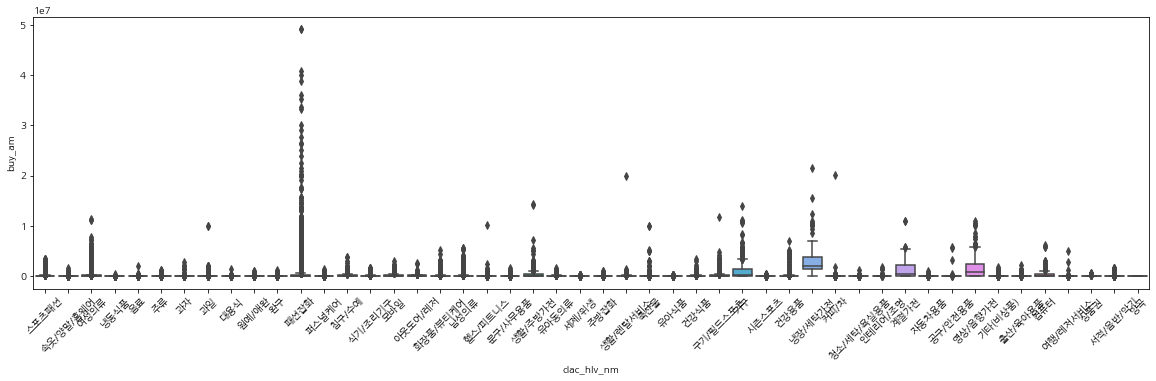

In [ ]:
plt.figure(figsize = (20,5))
sns.boxplot(y='buy_am',x='clac_hlv_nm',data=cus_3040_fe)
plt.xticks(rotation = 45)
plt.show()

In [ ]:
cus_3040_fe[cus_3040_fe['clac_hlv_nm'] == '여성의류']['buy_am'].sort_values(ascending = False)

627016     11301850.0
625631     11115000.0
625632     11112000.0
607547      7750000.0
607131      7445000.0
              ...    
1988509         100.0
1986379         100.0
1982912         100.0
1982373         100.0
592792           30.0
Name: buy_am, Length: 33023, dtype: float64

In [ ]:
cus_3040_fe[cus_3040_fe['clac_hlv_nm'] == '과일']['buy_am'].sort_values(ascending = False)

4173847    10000000.0
4173693    10000000.0
4173696     2000000.0
4173697     2000000.0
4173698     2000000.0
              ...    
2002778         100.0
2002788         100.0
2006575          80.0
2008709          50.0
2009168          50.0
Name: buy_am, Length: 7011, dtype: float64

In [ ]:
cus_3040_fe[cus_3040_fe['clac_hlv_nm'] == '패션잡화']['buy_am'].quantile(0.99)

6366000.000000058

In [ ]:
a = cus_3040_fe[cus_3040_fe['clac_hlv_nm'] == '패션잡화']
index9 = a[ (a['buy_am']> 8000000) ].index

In [ ]:
cus_3040_fe[cus_3040_fe['clac_hlv_nm'] == '헬스/피트니스']['buy_am'].sort_values(ascending = False)

4375621    10115000.0
4027343     2424000.0
4359001     1632000.0
4379947     1390000.0
4027897     1168000.0
              ...    
4331776         100.0
4330924         100.0
4330910         100.0
4331779         100.0
743839          100.0
Name: buy_am, Length: 2408, dtype: float64

In [ ]:
cus_3040_fe[cus_3040_fe['clac_hlv_nm'] == '생활/주방가전']['buy_am'].sort_values(ascending = False)

820423     14330010.0
820424     14090000.0
820699      7160000.0
3863141     5690000.0
4238115     5146000.0
              ...    
3863178         100.0
3863175         100.0
3863172         100.0
3863079         100.0
3863110         100.0
Name: buy_am, Length: 1573, dtype: float64

In [ ]:
cus_3040_fe[cus_3040_fe['clac_hlv_nm'] == '생활/렌탈서비스']['buy_am'].sort_values(ascending = False)

4381606    20000000.0
4269288     1515000.0
1058649     1000000.0
1052299     1000000.0
1054856     1000000.0
              ...    
4269570         100.0
4269567         100.0
4269388         100.0
4269556         100.0
4269363         100.0
Name: buy_am, Length: 381, dtype: float64

In [ ]:
cus_3040_fe[cus_3040_fe['clac_hlv_nm'] == '축산물']['buy_am'].sort_values(ascending = False)

3758448    10000000.0
3758645    10000000.0
4287453     5148000.0
1708013     5000000.0
3767578     5000000.0
              ...    
3260693         100.0
3260339         100.0
3260109         100.0
3260074         100.0
3259701         100.0
Name: buy_am, Length: 5250, dtype: float64

In [ ]:
cus_3040_fe[cus_3040_fe['clac_hlv_nm'] == '구기/필드스포츠']['buy_am'].sort_values(ascending = False)

4366987    11744000.0
4272195     4819000.0
4271695     4233000.0
4272196     3728000.0
1945363     3525600.0
              ...    
3452668         100.0
3452152         100.0
3452463         100.0
3452485         100.0
3452784         100.0
Name: buy_am, Length: 1702, dtype: float64

In [ ]:
cus_3040_fe[cus_3040_fe['clac_hlv_nm'] == '가구']['buy_am'].sort_values(ascending = False).head(20)

4112371    13920000.0
4112330    11160000.0
4112333    10890000.0
4112335    10890000.0
4112350    10670000.0
4112347    10580000.0
4112223     8333340.0
4112281     8252000.0
4112246     6846000.0
4112142     6496850.0
4112141     6496850.0
4103667     6000000.0
4103735     5787000.0
4112332     5711000.0
4112368     5580000.0
1964743     5578950.0
1965010     5555560.0
4112178     5490000.0
4363635     5474000.0
4103940     5425000.0
Name: buy_am, dtype: float64

In [ ]:
cus_3040_fe[cus_3040_fe['clac_hlv_nm'] == '냉장/세탁가전']['buy_am'].quantile(0.99)

10428000.0

In [ ]:
a = cus_3040_fe[cus_3040_fe['clac_hlv_nm'] == '냉장/세탁가전']
index10 = a[ (a['buy_am']> 10428000) ].index

In [ ]:
cus_3040_fe[cus_3040_fe['clac_hlv_nm'] == '커피/차']['buy_am'].sort_values(ascending = False)

3325501    20046200.0
4066368     1840000.0
3324252      511300.0
3328286      502400.0
3324413      465300.0
              ...    
4201591        1000.0
2280837        1000.0
3326313        1000.0
4228341         900.0
3717843         500.0
Name: buy_am, Length: 3031, dtype: float64

In [ ]:
cus_3040_fe[cus_3040_fe['clac_hlv_nm'] == '계절가전']['buy_am'].sort_values(ascending = False)

3863212    10900000.0
4360236    10900000.0
4360137     5800000.0
4360151     5800000.0
3863256     5688000.0
              ...    
4381626       15000.0
4381627       15000.0
4361008       13000.0
2912516        9800.0
2912415        7000.0
Name: buy_am, Length: 152, dtype: float64

In [ ]:
cus_3040_fe[cus_3040_fe['clac_hlv_nm'] == '공구/안전용품']['buy_am'].sort_values(ascending = False)

4380215    5763000.0
4380218    5662800.0
4380222    3272500.0
4380216     375000.0
4299309     197300.0
             ...    
4018072        720.0
4018075        720.0
4018074        720.0
4018070        720.0
3078996        500.0
Name: buy_am, Length: 71, dtype: float64

In [ ]:
cus_3040_fe[cus_3040_fe['clac_hlv_nm'] == '영상/음향가전']['buy_am'].sort_values(ascending = False).quantile(0.99)

10310000.0

In [ ]:
a = cus_3040_fe[cus_3040_fe['clac_hlv_nm'] == '영상/음향가전']
index11 = a[ (a['buy_am']> 10310000) ].index

In [ ]:
cus_3040_fe[cus_3040_fe['clac_hlv_nm'] == '컴퓨터']['buy_am'].sort_values(ascending = False)

4308806    6238000.0
4308450    5800000.0
4308452    5800000.0
4285367    3079000.0
4336253    3000000.0
             ...    
3456114       5300.0
4336223       4000.0
3953948       3800.0
3453911       2700.0
4309212       1000.0
Name: buy_am, Length: 570, dtype: float64

In [ ]:
cus_3040_fe[cus_3040_fe['clac_hlv_nm'] == '여행/레저서비스']['buy_am'].sort_values(ascending = False)

4365536    5004000.0
4365595    2880000.0
4365561    1200000.0
4365537     288000.0
4380003     275000.0
             ...    
3527550        500.0
3527572        500.0
3527545        500.0
3528511        500.0
3527546        500.0
Name: buy_am, Length: 1164, dtype: float64

In [ ]:
cus_3040_fe.drop([627016,625631,625632,4173847,4173693,4375621,820423,820424,4381606,3758448,3758645,4366987,4112371,4112330,4112333,4112335,4112350,4112347,4112223,4112281,3325501,4066368,3863212,4360236,4380215,4380218,4380222,4308806,4308450,4308452,4365536,4365595,4365561], axis=0, inplace = True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
cus_3040_fe.drop(index9, axis=0, inplace=True)
cus_3040_fe.drop(index10, axis=0, inplace=True)
cus_3040_fe.drop(index11, axis=0, inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
cus_3040_fe.groupby(['clac_hlv_nm','pd_nm'])['cust'].count().sort_values(ascending=False).head(50)

clac_hlv_nm  pd_nm        
기타(비상품)      임대매출             17152
남성의류         기타남성의류세트         16059
여성의류         여성티셔츠/탑           8907
과자           일반스낵              6852
남성의류         남성티셔츠             6196
스포츠패션        남성런닝/트레이닝화        5559
과자           쿠키                5413
스포츠패션        남성트레이닝복           4171
여성의류         기타여성의류세트          4084
             기타여성의류아우터         3944
대용식          일반빵               3654
패션잡화         기타패션잡화            3574
유아동의류        남아티셔츠/탑           3501
음료           커피음료              3426
대용식          기타레토르트            2959
스포츠패션        남성스포츠티셔츠          2842
여성의류         여성재킷              2582
과일           기타국산과일류           2538
여성의류         여성원피스             2517
상품권          식음료모바일상품권         2331
유아동의류        여아티셔츠/탑           2210
아웃도어/레저      기타아웃도어/레저용품       2035
여성의류         여성블라우스            1860
주류           레드와인              1737
스포츠패션        여성런닝/트레이닝화        1727
여성의류         여성바지              1539
화장품/뷰티케어     스킨/토너             1493
상

In [ ]:
cus_3040_fe.groupby(['clac_hlv_nm','pd_nm'])["buy_am"].sum().sort_values(ascending=False).head(50)

clac_hlv_nm  pd_nm      
패션잡화         기타패션잡화         1.426045e+09
             여성가방액세서리       1.341096e+09
             여성숄더백          1.050075e+09
             여성토트백          9.447330e+08
여성의류         기타여성의류세트       8.210448e+08
             여성재킷           7.965634e+08
             여성티셔츠/탑        7.655324e+08
             기타여성의류아우터      7.053474e+08
남성의류         기타남성의류세트       6.532155e+08
기타(비상품)      임대매출           6.156944e+08
남성의류         남성티셔츠          5.553360e+08
여성의류         여성코트           5.427523e+08
             여성원피스          5.419858e+08
스포츠패션        남성런닝/트레이닝화     4.644322e+08
냉장/세탁가전      드럼세탁기          4.294380e+08
가구           침대             4.073412e+08
냉장/세탁가전      양문형냉장고         4.012652e+08
패션잡화         남성시계           3.942050e+08
             기타보석류          3.540368e+08
스포츠패션        남성트레이닝복        3.446316e+08
패션잡화         반지             3.075298e+08
가구           소파             2.939745e+08
유아동의류        남아티셔츠/탑        2.768311e+08
화장품/뷰티케어     에센스/세럼         2.58

In [ ]:
for i in cus_3040_fe['clac_hlv_nm'].unique():
   print(cus_3040_fe[cus_3040_fe['clac_hlv_nm'] == i ].groupby('pd_nm')['buy_am'].sum().sort_values(ascending = False).head(10))
   print('-'*10)

pd_nm
남성런닝/트레이닝화     464432250.0
남성트레이닝복        344631570.0
남성스포츠티셔츠       251646020.0
여성골프티셔츠/탑      202052160.0
남성골프티셔츠        188473990.0
여성런닝/트레이닝화     141107030.0
남성등산/아웃도어세트    126441760.0
남성등산티셔츠        114372070.0
남성등산점퍼/재킷       93944380.0
남성골프의류세트        86223620.0
Name: buy_am, dtype: float64
----------
pd_nm
기타여성속옷    91939000.0
여성속옷세트    45387510.0
유아동내의     42068650.0
브래지어      40537692.0
남성팬티      11532640.0
남성일반양말     8539790.0
유아동팬티      7276380.0
스타킹        6448270.0
여성팬티       5864070.0
여아실내복      5470000.0
Name: buy_am, dtype: float64
----------
pd_nm
기타여성의류세트     821044790.0
여성재킷         796563440.0
여성티셔츠/탑      765532440.0
기타여성의류아우터    705347370.0
여성코트         542752320.0
여성원피스        541985820.0
여성블라우스       251308920.0
여성패딩         208964400.0
여성기타모피의류     193631100.0
여성스웨터/풀오버    123044820.0
Name: buy_am, dtype: float64
----------
pd_nm
냉동만두       6278900.0
기타냉동간편식    5921000.0
냉동디저트      2729040.0
콘아이스크림     2167000.0
바아이스크림     1821880.0
냉동떡볶이      1664600.0


In [ ]:
for i in cus_3040_fe['clac_hlv_nm'].unique():
   print(cus_3040_fe[cus_3040_fe['clac_hlv_nm'] == i ].groupby('pd_nm')['buy_ct'].count().sort_values(ascending = False).head(10))
   print('-'*10)

pd_nm
남성런닝/트레이닝화     5559
남성트레이닝복        4171
남성스포츠티셔츠       2842
여성런닝/트레이닝화     1727
여성트레이닝복        1147
남성등산/아웃도어세트    1040
남성등산티셔츠         980
남성일반스포츠바지       925
여성골프티셔츠/탑       909
남성골프티셔츠         744
Name: buy_ct, dtype: int64
----------
pd_nm
기타여성속옷    1195
유아동내의     1021
여성속옷세트     732
브래지어       702
남성일반양말     337
여성팬티       318
스타킹        308
유아동팬티      291
남성팬티       257
여성일반양말     197
Name: buy_ct, dtype: int64
----------
pd_nm
여성티셔츠/탑      8907
기타여성의류세트     4084
기타여성의류아우터    3944
여성재킷         2582
여성원피스        2517
여성블라우스       1860
여성바지         1539
여성정장세트       1204
여성코트         1133
여성스웨터/풀오버     973
Name: buy_ct, dtype: int64
----------
pd_nm
기타냉동간편식    710
냉동만두       438
콘아이스크림     366
냉동디저트      193
냉동떡볶이      164
컵아이스크림     158
바아이스크림     140
냉동피자        62
냉동핫도그       40
냉동밥         37
Name: buy_ct, dtype: int64
----------
pd_nm
커피음료       3426
과일음료       1282
생수         1024
혼합탄산        794
기타기능성음료     606
과채혼합음료      557
일반차음료       354
일반두유        156
콜라        